# Diabetes_AI

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
import joblib

In [2]:
# Load the dataset
df = pd.read_csv("diabetes_risk_dataset_.csv")

# Quick look
print(df.head())
print(df.info())
print(df['Diabetes_Risk'].value_counts())

   Age   BMI Physical_Inactivity Family_History Hypertension     Sex  \
0   69  25.7                 Low             No          Yes  Female   
1   32  32.1            Moderate             No           No    Male   
2   89  18.9            Moderate             No          Yes    Male   
3   78  28.7            Moderate            Yes          Yes    Male   
4   38  27.1            Moderate             No           No    Male   

   Blood_Glucose  Diet_Score Diabetes_Risk  
0          102.8         9.9  Intermediate  
1           66.5         9.5           Low  
2          103.9        10.0  Intermediate  
3          106.2        10.0          High  
4           72.7        10.0           Low  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1000 non-null   int64  
 1   BMI                  1000 non-null   

In [3]:
# Convert categorical columns for correlation
df_encoded = df.copy()
df_encoded['Physical_Inactivity'] = df_encoded['Physical_Inactivity'].map({"Low": 0, "Moderate": 1, "High": 2})
df_encoded['Family_History'] = df_encoded['Family_History'].map({"No": 0, "Yes": 1})
df_encoded['Hypertension'] = df_encoded['Hypertension'].map({"No": 0, "Yes": 1})
df_encoded['Sex'] = df_encoded['Sex'].map({"Male": 1, "Female": 0})
df_encoded['Diabetes_Risk'] = df_encoded['Diabetes_Risk'].map({"Low": 0, "Intermediate": 1, "High": 2})
print(df_encoded.head())
print(df_encoded.shape)
# Save Encoded file as CSV
df_encoded.to_csv("diabetes_encoded.csv", index=False)

   Age   BMI  Physical_Inactivity  Family_History  Hypertension  Sex  \
0   69  25.7                    0               0             1    1   
1   32  32.1                    1               0             0    0   
2   89  18.9                    1               0             1    0   
3   78  28.7                    1               1             1    0   
4   38  27.1                    1               0             0    0   

   Blood_Glucose  Diet_Score  Diabetes_Risk  
0          102.8         9.9              1  
1           66.5         9.5              0  
2          103.9        10.0              1  
3          106.2        10.0              2  
4           72.7        10.0              0  
(1000, 9)


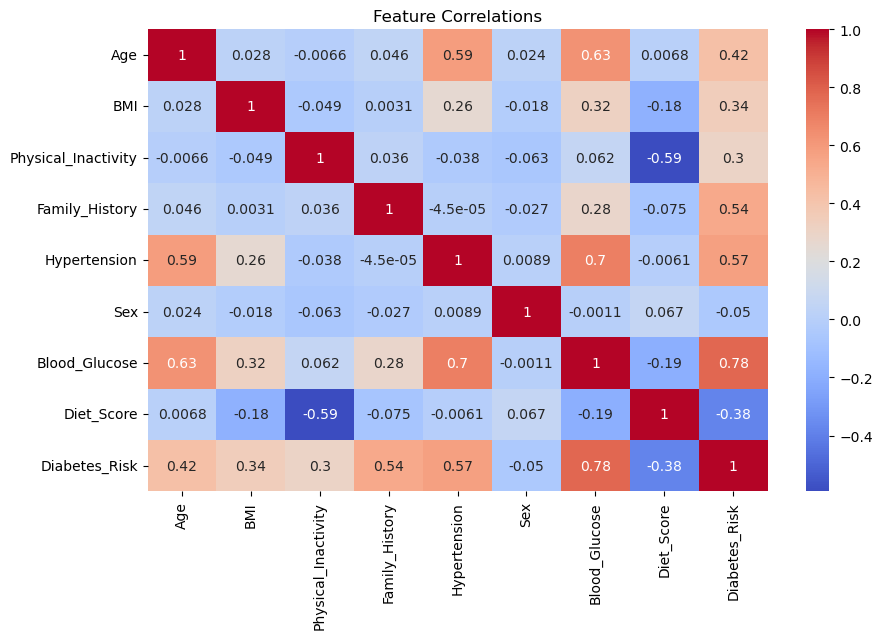

In [4]:
# Correlation heatmap and Visualize Relationships
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlations")
plt.show()

In [5]:
# Prepare Data for Machine Learning

y = df_encoded['Diabetes_Risk']
print(y.head())
# One-hot encode categorical features
#df.drop('col2', axis=1)
X = df_encoded.drop('Diabetes_Risk', axis = 1)
print(X.shape)
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


0    1
1    0
2    1
3    2
4    0
Name: Diabetes_Risk, dtype: int64
(1000, 8)


In [10]:
# Train a RandomForest Machine Learning Model

# Train the model
RFmodel = RandomForestClassifier(n_estimators=200, random_state=123)
RFmodel.fit(X_train, y_train)

# Predict
y_pred = RFmodel.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred)) #target_names=le.classes_

'''
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
'''

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        70
           1       0.87      0.91      0.89        76
           2       0.96      0.91      0.93        54

    accuracy                           0.92       200
   macro avg       0.92      0.91      0.92       200
weighted avg       0.92      0.92      0.92       200



'\nsns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=\'d\', cmap=\'Blues\',\n            xticklabels=le.classes_, yticklabels=le.classes_)\nplt.xlabel("Predicted")\nplt.ylabel("True")\nplt.title("Confusion Matrix")\nplt.show()\n'

In [21]:
# Try Other Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "GradientBoosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metric="mlogloss")
}

for name, m in models.items():
    m.fit(X_train, y_train)
    acc = m.score(X_test, y_test)
    print(f"{name}: {acc:.3f}")


LogisticRegression: 0.985
GradientBoosting: 0.885
XGBoost: 0.905


# Continued with Random Forest

/tmp/ipykernel_8131/1477937891.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=np.array(X.columns)[indices], palette="viridis")


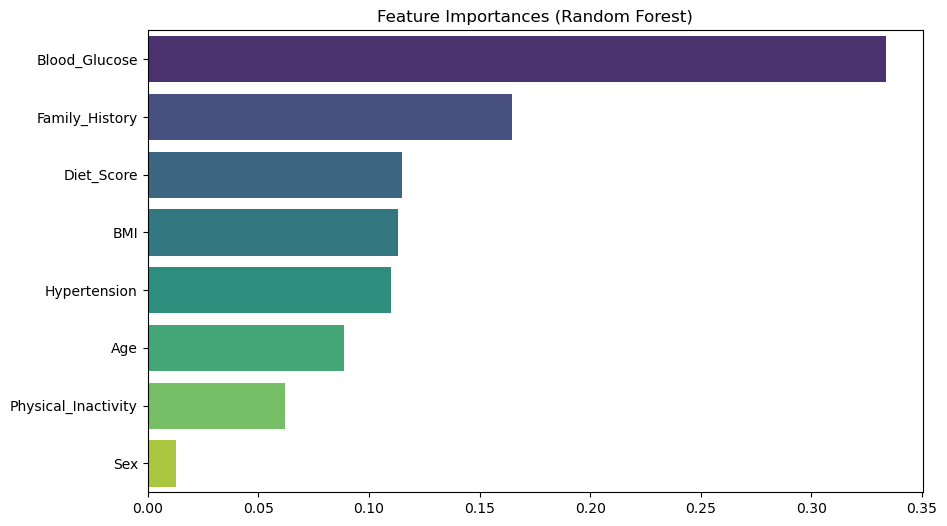

In [12]:
# Interpret Feature Importance

importances = RFmodel.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=np.array(X.columns)[indices], palette="viridis")
plt.title("Feature Importances (Random Forest)")
plt.show()


In [22]:
'''
# Model Optimization (Hyperparameter Tuning)
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,                 # 5-fold cross-validation
    scoring='accuracy',   # Optimize for accuracy
    n_jobs=-1,            # Use all CPU cores
    verbose=2
)

# Run the search
grid_search.fit(X_train, y_train)

# Best parameters and score
print("✅ Best Parameters Found:")
print(grid_search.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# Best model
best_model = grid_search.best_estimator_

# Evaluate on test data
from sklearn.metrics import classification_report, confusion_matrix
y_pred_best = best_model.predict(X_test)

print("\n🎯 Optimized Model Performance on Test Data:")
print(classification_report(y_test, y_pred_best, target_names=le.classes_))
'''

'\n# Model Optimization (Hyperparameter Tuning)\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.ensemble import RandomForestClassifier\n\n# Define parameter grid for Random Forest\nparam_grid = {\n    \'n_estimators\': [100, 200, 300],\n    \'max_depth\': [None, 10, 20, 30],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4],\n    \'max_features\': [\'sqrt\', \'log2\']\n}\n\n# Initialize GridSearchCV\ngrid_search = GridSearchCV(\n    estimator=RandomForestClassifier(random_state=42),\n    param_grid=param_grid,\n    cv=5,                 # 5-fold cross-validation\n    scoring=\'accuracy\',   # Optimize for accuracy\n    n_jobs=-1,            # Use all CPU cores\n    verbose=2\n)\n\n# Run the search\ngrid_search.fit(X_train, y_train)\n\n# Best parameters and score\nprint("✅ Best Parameters Found:")\nprint(grid_search.best_params_)\nprint(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")\n\n# Best model\nbest_model = grid_search.b

In [14]:
'''
# Compare Before vs After Optimization
from sklearn.metrics import accuracy_score

baseline_acc = accuracy_score(y_test, y_pred)  # from earlier model
optimized_acc = accuracy_score(y_test, y_pred_best)

print(f"Baseline Accuracy: {baseline_acc:.3f}")
print(f"Optimized Accuracy: {optimized_acc:.3f}")
'''

Baseline Accuracy: 0.915
Optimized Accuracy: 0.915


In [19]:
# Save the trained RandomForest Model
joblib.dump(RFmodel, 'diabetesRF.pkl')

['diabetesRF.pkl']

In [20]:
# Prediction function TO TEST RF MODEL
loaded_model = joblib.load('diabetesRF.pkl')

input_data = (68,32.9,0,0,0,0,92.5,8.6)
data_as_numpy = np.asarray(input_data)
reshaped_data = data_as_numpy.reshape(1,-1)

prediction = loaded_model.predict(reshaped_data)
print(prediction)

if prediction == 0:
    print('Low Diabetes risk predicted')
elif prediction == 1:
    print('Intermediate Diabetes risk predicted')
else:
    print('High Diabetes risk predicted!')

[1]
Intermediate Diabetes risk predicted


In [ ]:
import streamlit as st
import joblib

